## Gaggle Of Regressors Exercise_Solutions

#### import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### import data. This data is AirQuality UCI. Available in Excel in this folder

In [2]:
df = pd.read_excel('AirQualityUCI.xlsx')

#### Check the head of dataframe

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


#### Perform EDA, check shape, datatypes, do treatment for null values

In [4]:
df.shape

(9357, 15)

In [5]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

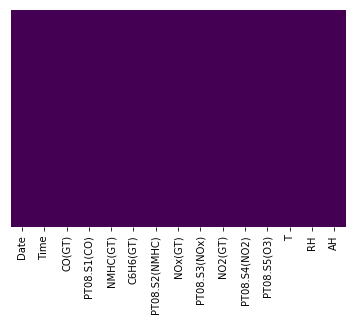

In [6]:
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

#### drop columns Date and time Columns

In [7]:
df.drop(['Date','Time'],axis=1,inplace=True)

#### import train_test_split from sklearn

In [8]:
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Create variables X and y.  y variable is AH column

In [9]:
X = df.drop('AH',axis=1)
y = df['AH']

#### split the data into 80% training and 20% testing and random state as 101

In [10]:
## we are splitting data based on pareto principle.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

#### Import Metrics like r2_score, explained_variance_score, mean_absolute_error

In [13]:
from sklearn.metrics import r2_score,explained_variance_score,mean_absolute_error

#### Import all the regressors

In [14]:
from sklearn.linear_model import LinearRegression,RANSACRegressor,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#### create a list for all classifiers

In [15]:
regressors = [LinearRegression(),RANSACRegressor(),Lasso(),Ridge(),DecisionTreeRegressor(),KNeighborsRegressor()
             ,GaussianProcessRegressor(),RandomForestRegressor(),SVR()]

#### fit the model into the object and predict the results, then compare them

In [16]:
for model in regressors[:10]:
    model.fit(X_train,y_train)    
    predictions = model.predict(X_test)
   
    print(model)
    print("\t Explained vairance:",explained_variance_score(y_test,predictions))
    print("\t MAE:",mean_absolute_error(y_test,predictions))
    print("\t R2_score:",r2_score(y_test,predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
	 Explained vairance: 0.9993842348627742
	 MAE: 0.7467218286476194
	 R2_score: 0.999384005594736

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)
	 Explained vairance: 0.09691877922086067
	 MAE: 7.95192964135329
	 R2_score: 0.05835434118007432

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
	 Explained vairance: 0.9993703196640651
	 MAE: 0.7637293213872672
	 R2_score: 0.9993700789683035

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


## Suggest which is the best model!

## Good Job!